## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Rodrigo
- Apellido: Perez Garofalo
- Legajo: 1632589

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [1]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [2]:
diabetes = pd.read_csv("/Users/rodrigoperezgarofalo/Desktop/clusterAI_TP/ClusterAI_TP_dataset_diabetes.csv")

##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [3]:
print("El dataset tiene " + str(diabetes.shape[0]) + " muestras, y " + str(diabetes.shape[1]) + " variables")

El dataset tiene 768 muestras, y 9 variables


##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

In [5]:
sns.set_style("darkgrid")
sns.set_context("paper")

Text(0.5, 1.0, 'Distribución de personas con diabetes')

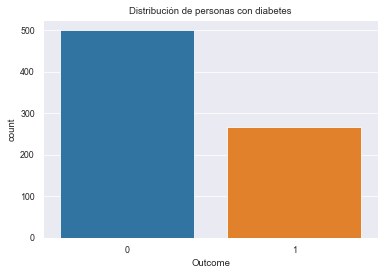

In [6]:
sns.countplot(x=diabetes["Outcome"])
plt.title("Distribución de personas con diabetes")

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

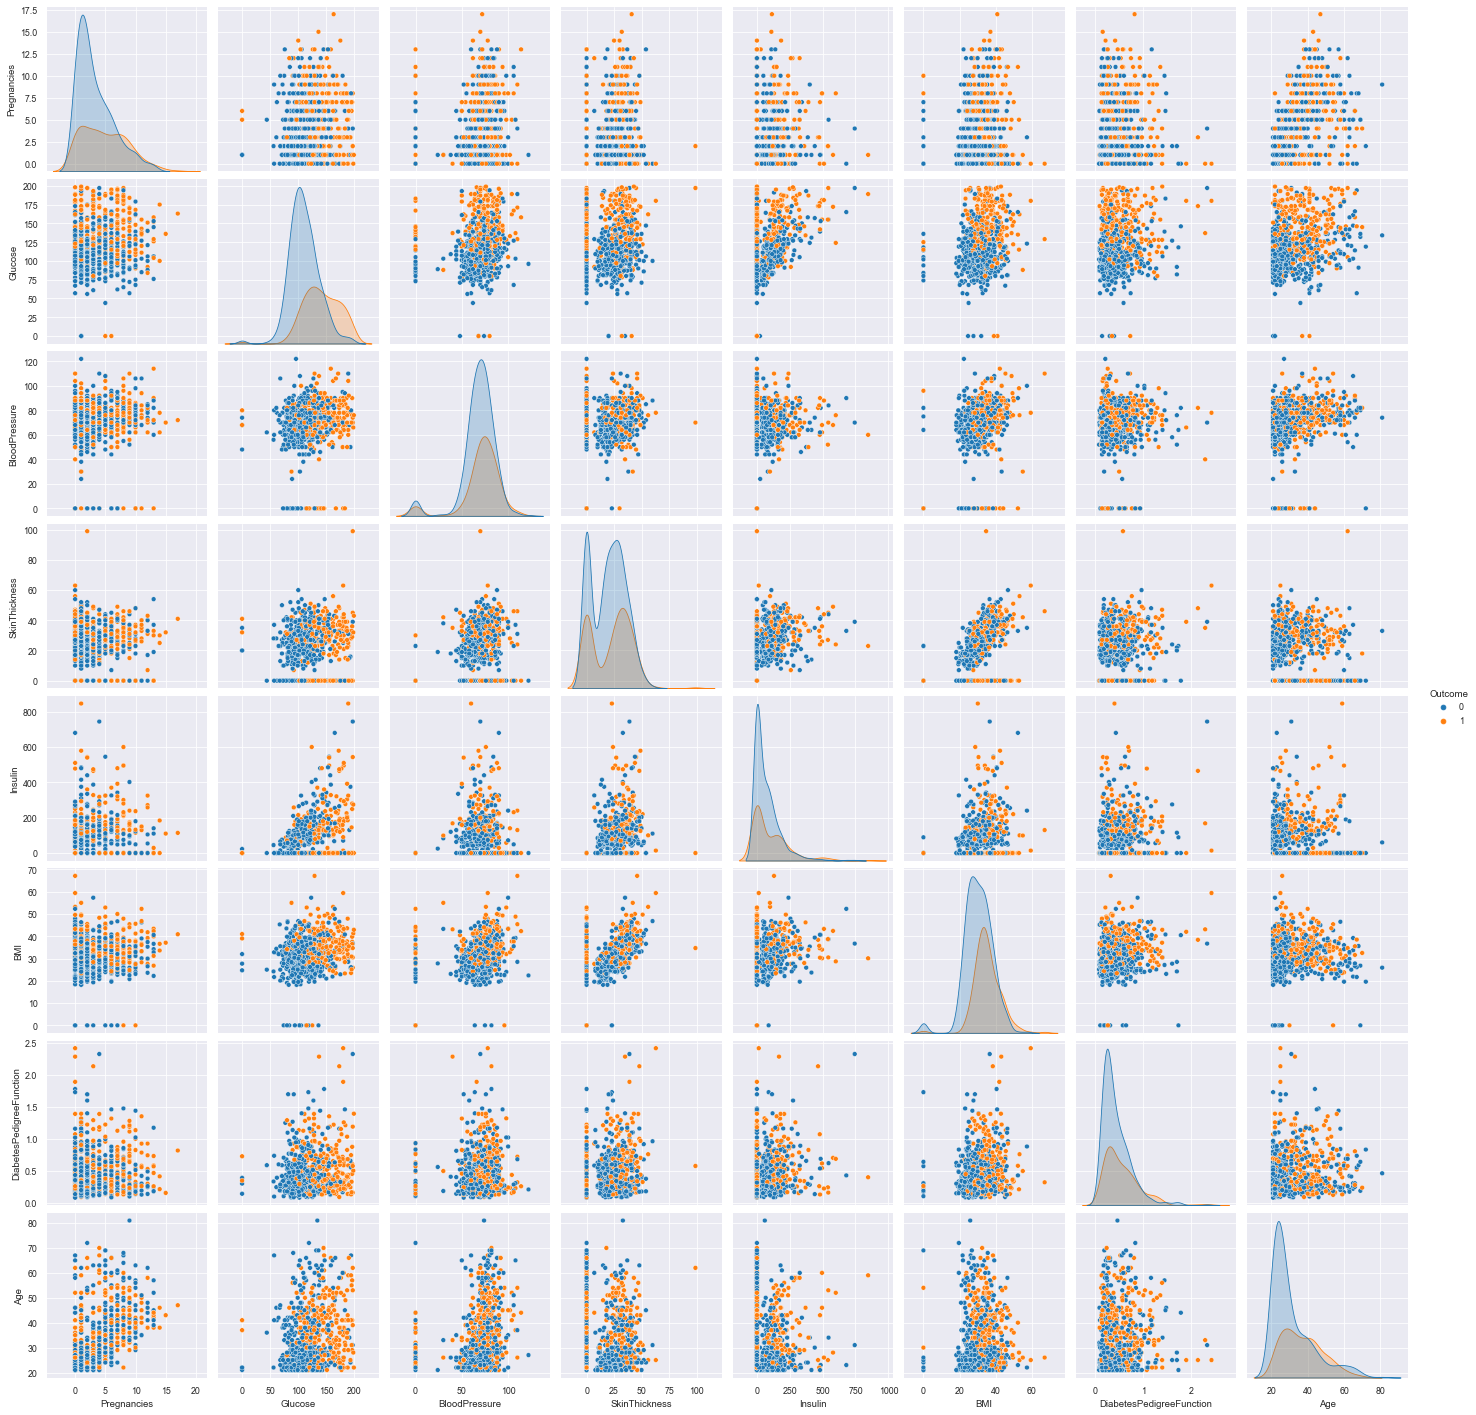

In [8]:
sns.pairplot(diabetes,hue="Outcome")
plt.show()

- El nivel de glucosa parece ser la variable mas asociada a tener o no diabetes

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

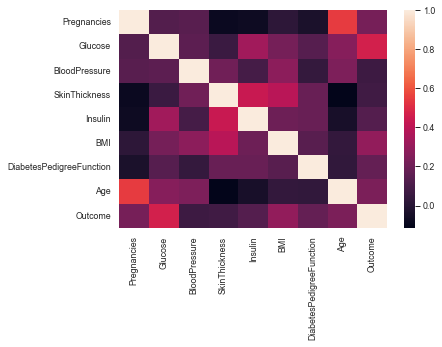

In [9]:
cormat = diabetes.corr()
round(cormat,1)
sns.heatmap(cormat)
plt.show()

Los dos pares de variables mas correlcionadas son:
- Edad y embarazos con un coeficiente de Pearson de aproximadamente 0.6, lo que indica una correlación media-alta
- Glucosa y outcome con un coeficiente de Pearson aproximadamente 0.5, lo que indica una correlación media, y de nuestro analisis previo se puede afirmar que es una correlación directa

Podríamos decidir que el nivel de glucosa sera la principal variable para determinar si una persona tiene diabetes o no

##### **Objetivo 8**
Hacer un histograma de la variable BMI

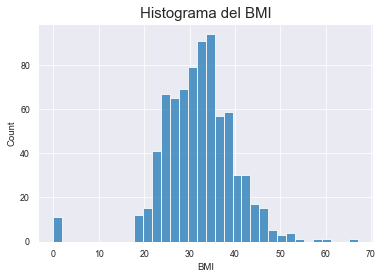

In [10]:
sns.histplot(diabetes['BMI'])
plt.title("Histograma del BMI",size=15)
plt.show()

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

Si, hay alrededor de 10 muestras cuyo BMI es igual a 0

/Users/rodrigoperezgarofalo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

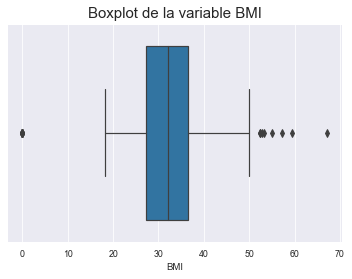

In [11]:
sns.boxplot(diabetes['BMI'])
plt.title('Boxplot de la variable BMI', size=15)
plt.show

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [12]:
oldshape = diabetes.shape
print(oldshape)

(768, 9)


In [13]:
diabetes = diabetes[diabetes['BMI'] > 10]
newshape = diabetes.shape
print(newshape)

(757, 9)


Se filtraron 11 muestras cuyo BMI era menor a 10

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

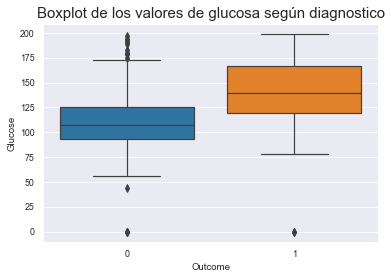

In [15]:
sns.boxplot(data=diabetes,y="Glucose",x="Outcome")
plt.title("Boxplot de los valores de glucosa según diagnostico",size=15)
plt.show()

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

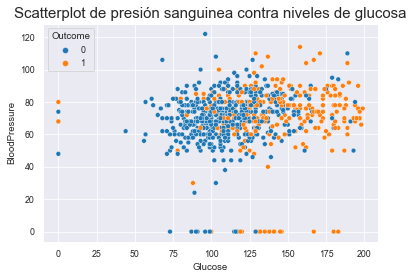

In [17]:
sns.scatterplot(data=diabetes,x="Glucose",y="BloodPressure", hue="Outcome")
plt.title("Scatterplot de presión sanguinea contra niveles de glucosa", size=15)
plt.show()


No puedo ver una relación clara entre las dos variable

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [18]:
#Definimos y creamos las bandas:
list_bandas = [0,30,40]

# Usaremos un 'for loop' con 'enumerate':
# El enumerate simplemente agrega al iterador una variable que "enumera" las iteraciones.
for i, i_banda in enumerate(list_bandas,start=1):
    if i < len(list_bandas):
        banda_i = list_bandas[i-1]
        banda_f = list_bandas[i]
        print(f"Enumerate --> i= {i}, banda_i= {banda_i}, banda_f= {banda_f}")
        diabetes.loc[(diabetes['Age'] > banda_i) & (diabetes['Age'] <= banda_f), 'Banda']   = i
    else:
        banda_f = i_banda
        print(f"Enumerate --> i= {i}, banda_f= {banda_f}")
        diabetes.loc[(diabetes['Age'] > banda_f), 'Banda']  = i

Enumerate --> i= 1, banda_i= 0, banda_f= 30
Enumerate --> i= 2, banda_i= 30, banda_f= 40
Enumerate --> i= 3, banda_f= 40


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

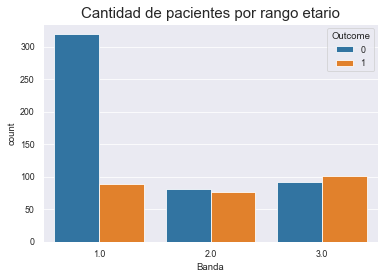

In [19]:
sns.countplot(data=diabetes,x='Banda',hue='Outcome')
plt.title("Cantidad de pacientes por rango etario", size=15)
plt.show()

A medida que aumenta la edad de las personas, la proporción de diabeticos sobre el total aumenta